File berhasil dibaca!
Jumlah Nilai sebelum imputasi:
 Programming Skill    0
dtype: int64

Hasil Transformasi t-SNE:
        Dim_1      Dim_2
0  -25.031668  44.869057
1   12.455816 -49.568264
2  -16.037170  51.530304
3  -20.067163  63.598545
4   -6.614944  11.520743
5   22.847986 -58.080223
6   10.629889 -32.900421
7    8.244394  -8.717136
8   -8.302712  20.885338
9  -28.883282  56.250847
10  12.744308 -20.472231
11  20.163904 -42.711205
12   1.768849 -24.200495
13  -2.133908 -12.311777
14 -15.140038  34.591721


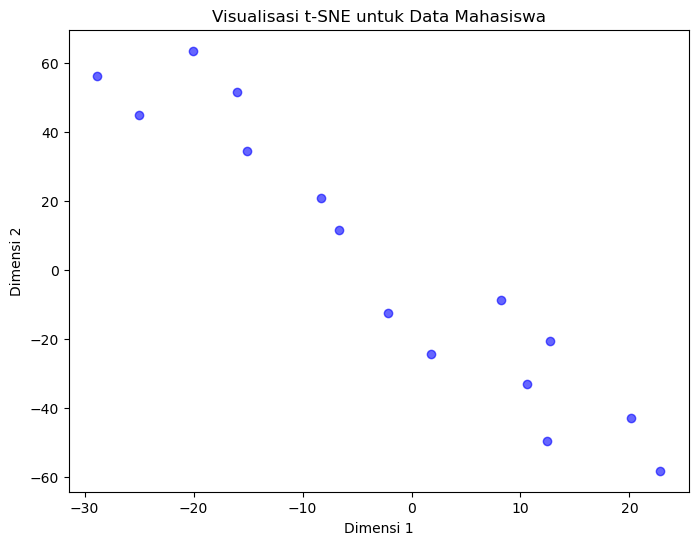

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Membaca dataset dengan penanganan error
file_path = r"C:\Users\User\Data Science\W05S02\Data_Mahasiswa.csv"

try:
    df = pd.read_csv(file_path, sep=None, engine='python', encoding="utf-8", on_bad_lines="skip")
    print("File berhasil dibaca!")
except Exception as e:
    print(f"Error saat membaca file: {e}")
    exit()

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=["number"])

# Ambil 15 Baris Pertama (Sampling)
df_numeric = df_numeric.head(15)

# Cek & Tangani Nilai N/A
print("Jumlah Nilai sebelum imputasi:\n", df_numeric.isnull().sum())

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(df_numeric)

# Normalisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Jalankan t-SNE
try:
    tsne = TSNE(n_components=2, perplexity=5, init="random", random_state=42)
    data_tsne = tsne.fit_transform(data_scaled)
except Exception as e:
    print(f"Error saat menjalankan t-SNE: {e}")
    exit()

# Konversi ke DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=["Dim_1", "Dim_2"])
print("\nHasil Transformasi t-SNE:")
print(tsne_df)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df["Dim_1"], tsne_df["Dim_2"], c='blue', alpha=0.6)
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.title("Visualisasi t-SNE untuk Data Mahasiswa")
plt.show()